In [1]:
library('Seurat')
library('dplyr')
library('tidyr')
library('ggplot2')
library('Matrix')
library(tibble)
library('RColorBrewer')

Attaching SeuratObject


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack




In [2]:
anno_col = list(
#     response_short = c(PRO = "rosybrown1", R = "lightgreen", '0' = 'gray95', PD = 'tomato'), 
#     treatment_group = c(ICI_PD1 = 'paleturquoise1', ICI_combo = 'turquoise', '0' = 'gray95'),
     sex = c(M = 'lightblue2', F = 'mistyrose'), 
     state = c(PRE = 'palegoldenrod', ON ='gold1', POST ='sandybrown'),
#      subtype = c(cutaneous = 'honeydew2', uveal = 'lightgoldenrodyellow', 
#                  mucosal = 'mistyrose2', 'unknown primary' = 'gray95'),
#      tissue = c(skin = 'lightskyblue1', breast = 'darkolivegreen3', liver = 'seagreen1',
#                  lymph = 'lightseagreen', brain = 'cyan', soft = 'steelblue1', colon = 'darkcyan',
#                 bone = 'seagreen3', '0' = 'gray95'),
    age = colorRampPalette(brewer.pal(4, "Blues")) (40),
    day = colorRampPalette(brewer.pal(4, "RdPu")) (40),
    pfs = colorRampPalette(brewer.pal(4, "Greys")) (40),
     ncells = colorRampPalette(brewer.pal(4, "Greens")) (40)  
               )

# Load object

In [ ]:
obj <- readRDS("/net/bmc-lab5/data/kellis/users/ruiwenfu/scRNA/metastatic_all/takeda_39metastaticSamples_mt10_SCTmerge_CD4T011422.rds")

# QC

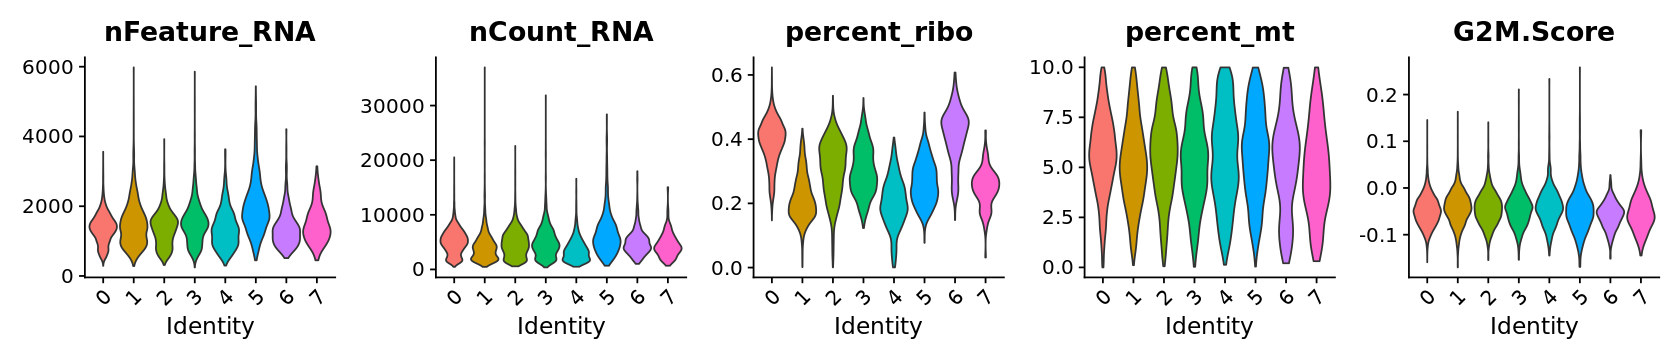

In [9]:
options(repr.plot.width=14, repr.plot.height=3)

VlnPlot(obj, group.by = 'SCT_snn_res.0.4', features = c('nFeature_RNA','nCount_RNA','percent_ribo','percent_mt','G2M.Score'),
         ncol = 5, pt.size = 0)

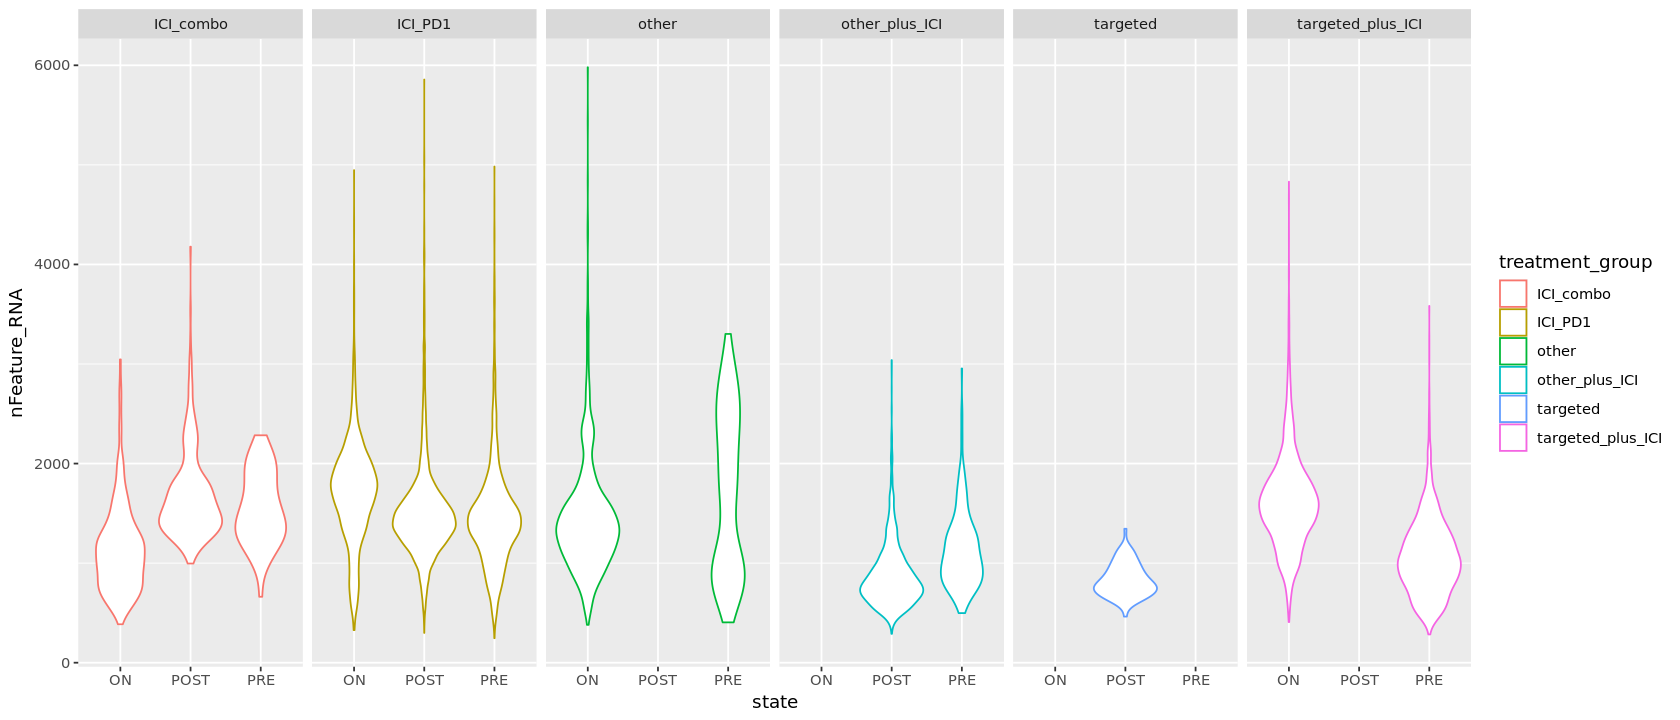

In [52]:
ggplot(obj[[]], aes(x=state, y=nFeature_RNA, col = treatment_group)) +
  geom_violin()  +facet_grid(~treatment_group)

#  PCA

In [29]:
obj <- RunPCA(obj, verbose = FALSE,  assay = "SCT",
              features =rownames(GetAssayData(obj, slot =  "scale.data", assay = 'SCT')))

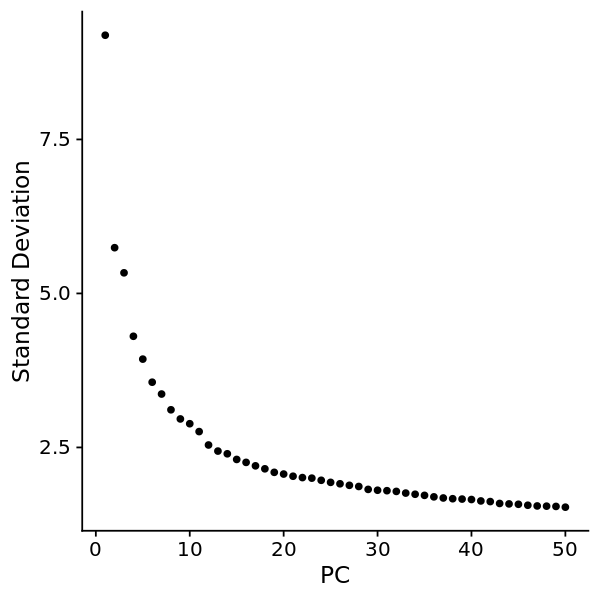

In [31]:
options(repr.plot.height = 5, repr.plot.width = 5)

ElbowPlot(obj, ndims = 50)

In [33]:
options(repr.plot.height = 3, repr.plot.width = 10)
DimPlot(object = obj, reduction = "harmony", group.by = c("sample_ID_long",'tissue'))

# harmony


In [39]:
library(harmony)

Loading required package: Rcpp



Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony 5/10

Harmony 6/10

Harmony 7/10

Harmony 8/10

Harmony converged after 8 iterations

Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.SCT.harmony; see ?make.names for more details on syntax validity”


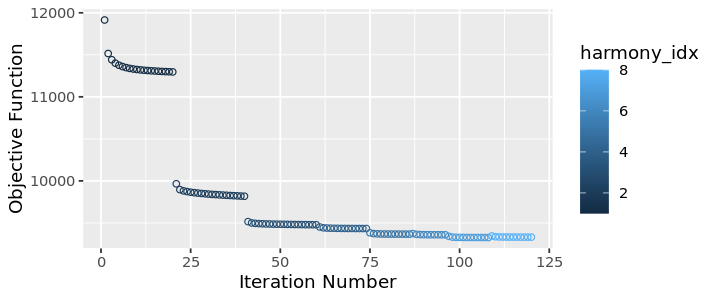

In [40]:
options(repr.plot.height = 2.5, repr.plot.width = 6)
obj <- obj %>% 
    RunHarmony(c("sample_ID_long"),
               assay.use = "SCT", plot_convergence = TRUE)

In [43]:
options(repr.plot.height = 5, repr.plot.width = 14)
DimPlot(object = obj, reduction = "harmony", group.by = c("sample_ID_long",'tissue'))

# UMAP

In [44]:
obj <- RunUMAP(obj, dims = 1:40, verbose = FALSE, reduction = "harmony")

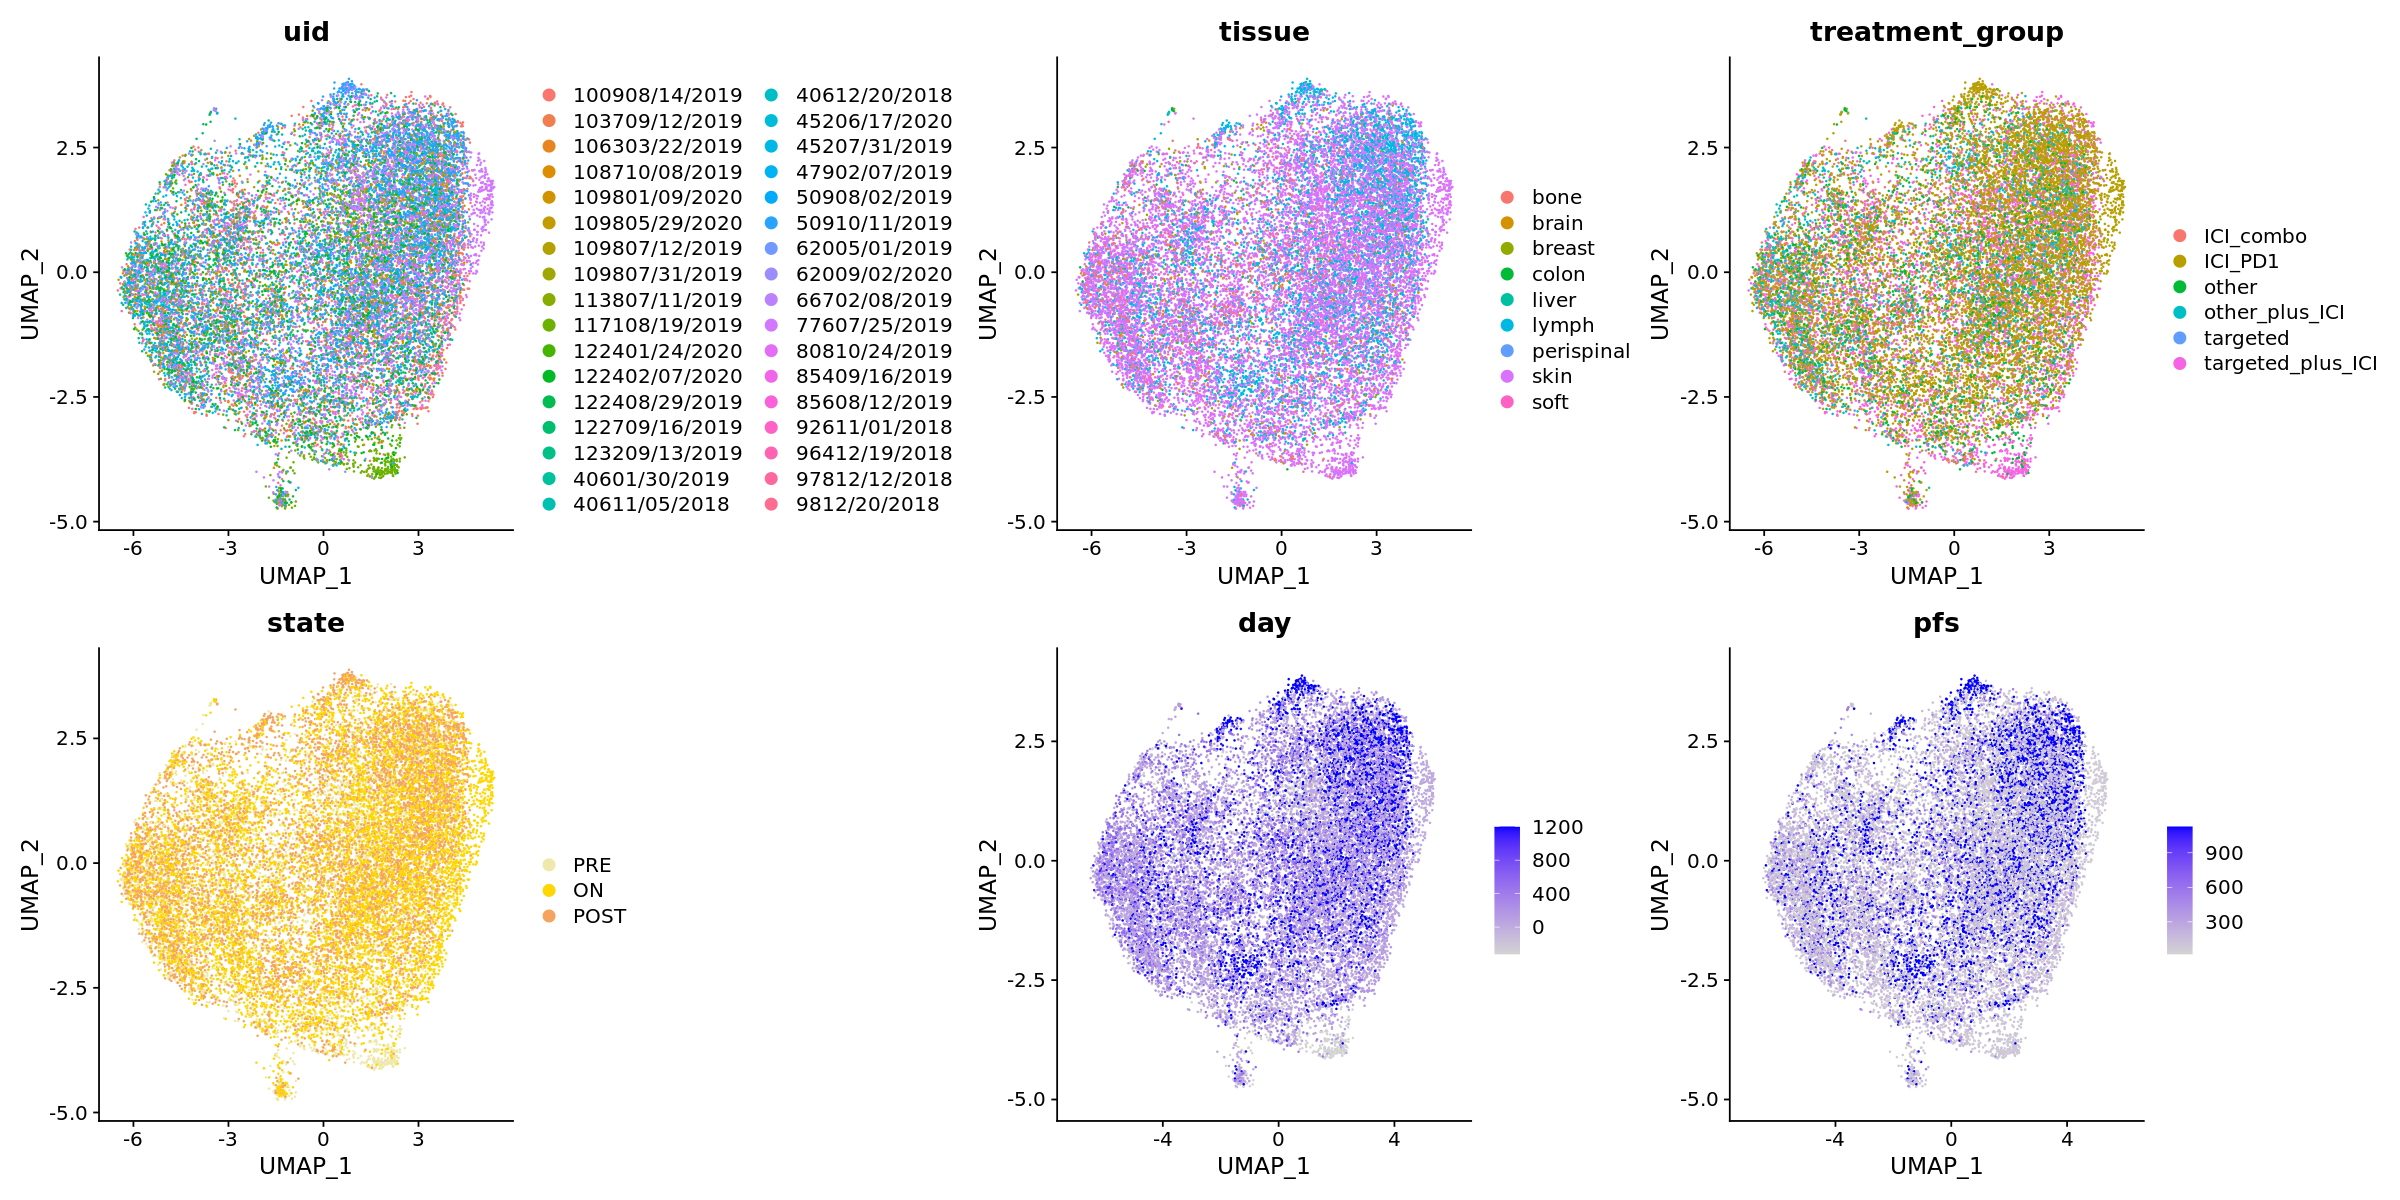

In [45]:
options(repr.plot.height = 10, repr.plot.width = 20)

p1 <- DimPlot(obj, reduction = "umap", group.by = "uid",   
              label.size = 3, repel = TRUE)
p2 <- DimPlot(obj, reduction = "umap", group.by = "tissue",  cols =anno_col$tissue ,
              label.size = 3, repel = TRUE)
p3 <- DimPlot(obj, reduction = "umap", group.by =  "treatment_group",  cols =anno_col$treatment_group , 
              label.size = 3, repel = TRUE)
p4 <- DimPlot(obj, reduction = "umap", group.by =  "state",  cols =anno_col$state , 
              label.size = 3, repel = TRUE)

p5 <- FeaturePlot(obj, features = c('day') ,  reduction = "umap", )
p6 <- FeaturePlot(obj, features = 'pfs' ,  reduction = "umap", )

p1+p2+p3+p4 +p5+p6

In [55]:
# QC
options(repr.plot.height = 6, repr.plot.width = 14)
FeaturePlot(obj, features = c("nFeature_RNA", "nCount_RNA", "percent_mt", "percent_ribo", "percent_heme",
                               'S.Score','G2M.Score'),
            ncol = 4,
            reduction = "umap")

# cell marker

In [ ]:
# memory
options(repr.plot.height = 6, repr.plot.width = 14)
FeaturePlot(obj, features = c("CCR7", "TCF7", "SELL", 'CCL3', 'TNF', 'IFNG','CCL5', 'CAPG'),
            ncol = 4, max.cutoff = 'q9',
            reduction = "umap")

In [ ]:
# cytotoxic
options(repr.plot.height = 12, repr.plot.width = 14)
FeaturePlot(obj, features = c('TBX21', 'ICOS', 'CXCL3','GATA3','IL4','CXCR5','IL10','IRF4',
                              'TGFB1','RORC','IL2RA',
                              'TOX', 'CTLA4','LAG3','HAVCR2','FOXP3'
                              ) , ncol = 4, max.cutoff = 'q9',
            reduction = "umap")

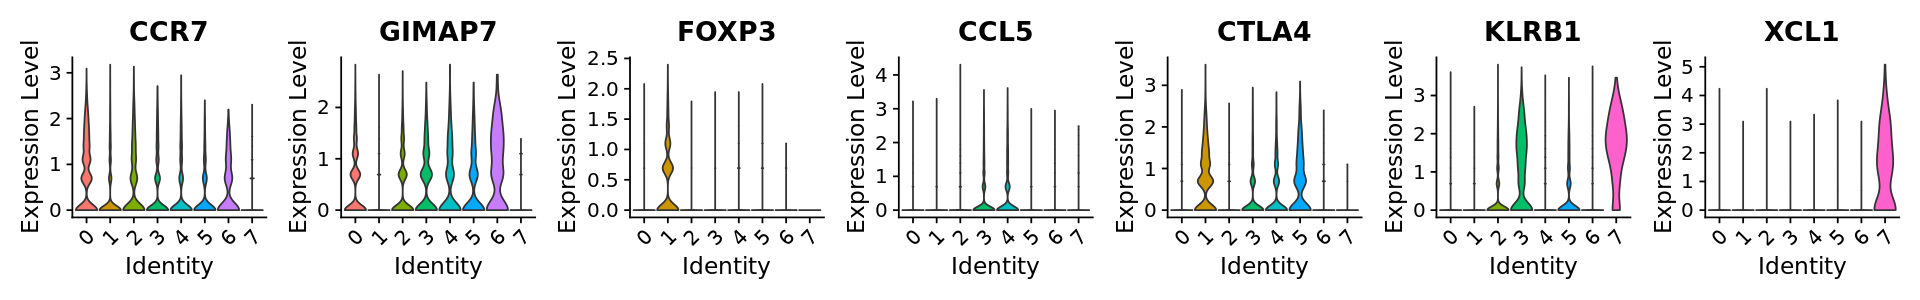

In [26]:
options(repr.plot.height = 2.5, repr.plot.width = 16)
VlnPlot(obj, features = c('CCR7','GIMAP7','FOXP3', 'CCL5', 'CTLA4', 'KLRB1',   'XCL1'), 
        ncol =7, pt.size = 0, group.by =  'SCT_snn_res.0.4')

# Clustering

In [1]:
obj <- readRDS("/net/bmc-lab5/data/kellis/users/ruiwenfu/scRNA/metastatic_all/takeda_39metastaticSamples_mt10_SCTmerge_CD4T011422.rds")

In [58]:
obj <- FindNeighbors(obj, dims = 1:40, reduction = 'harmony')
obj<- FindClusters(obj, resolution = c(0.4,0.6))

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 17952
Number of edges: 800684

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8173
Number of communities: 8
Elapsed time: 2 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 17952
Number of edges: 800684

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7874
Number of communities: 10
Elapsed time: 2 seconds


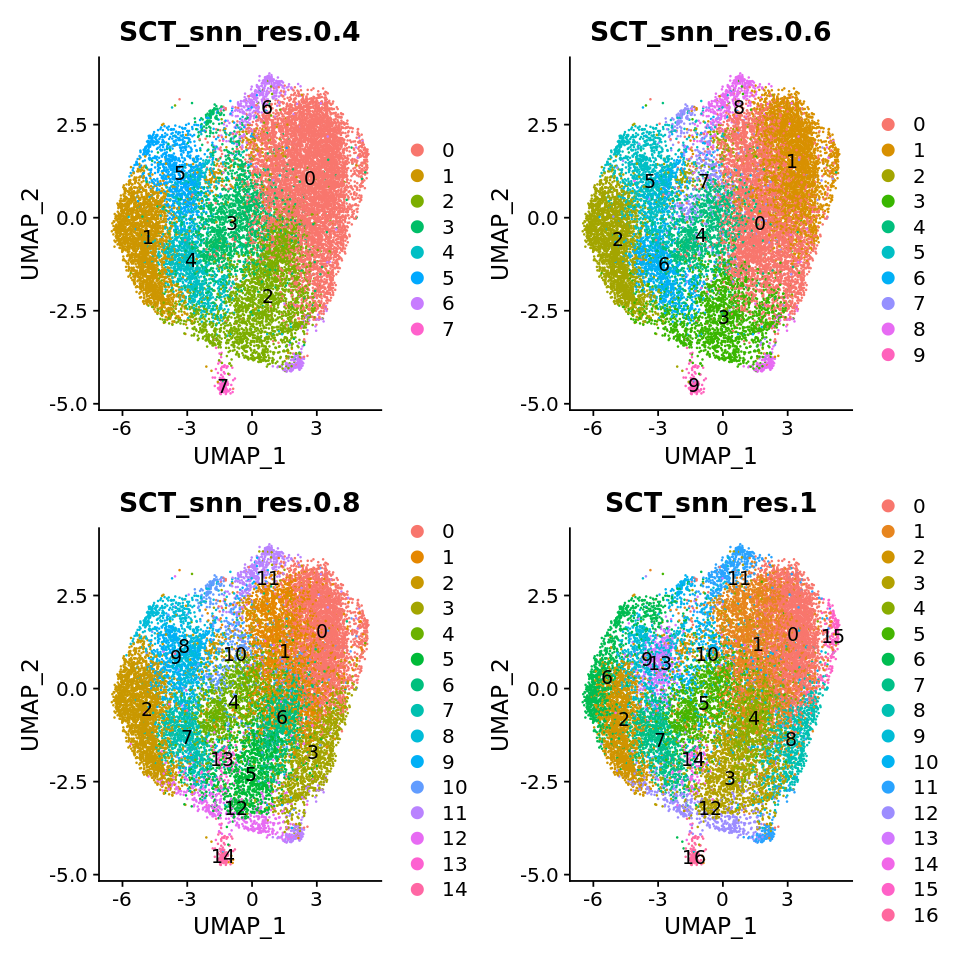

In [60]:
options(repr.plot.height = 8, repr.plot.width = 8)
p1 <- DimPlot(obj, reduction = "umap",group.by = "SCT_snn_res.0.4", label = TRUE)
p2 <- DimPlot(obj, reduction = "umap",group.by = "SCT_snn_res.0.6", label = TRUE)
p3 <- DimPlot(obj, reduction = "umap",group.by = "SCT_snn_res.0.8", label = TRUE)
p4 <- DimPlot(obj, reduction = "umap",group.by = "SCT_snn_res.1", label = TRUE)
p1+p2+p3+p4

In [61]:
Idents(object = obj) <- "SCT_snn_res.0.4"

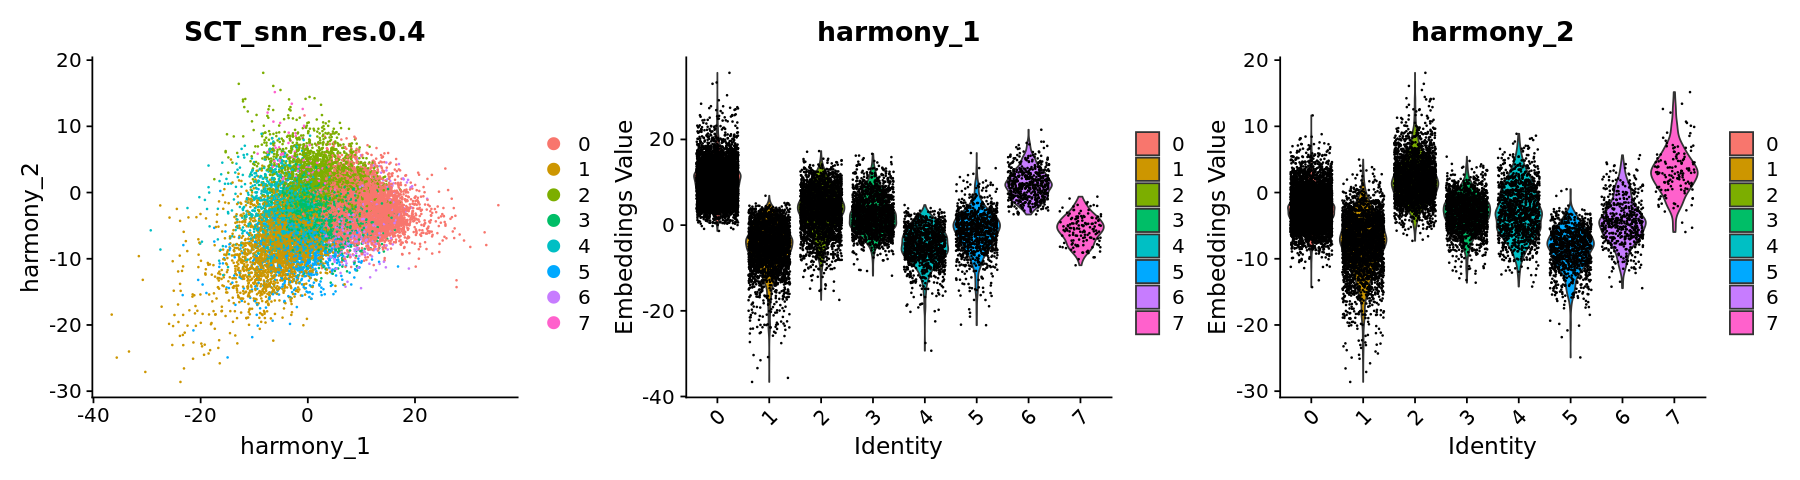

In [85]:
options(repr.plot.height =4, repr.plot.width = 15)
p1 <- DimPlot(object = obj, reduction = "harmony", pt.size = .1, group.by = "SCT_snn_res.0.4")
p2 <- VlnPlot(object = obj, features = "harmony_1", group.by = "SCT_snn_res.0.4", pt.size = .1)
p3 <- VlnPlot(object = obj, features = "harmony_2", group.by = "SCT_snn_res.0.4", pt.size = .1)
p1+p2+p3

In [87]:
# saveRDS(obj, "/net/bmc-lab5/data/kellis/users/ruiwenfu/scRNA/metastatic_all/takeda_39metastaticSamples_mt10_SCTmerge_CD4T011422.rds")


# Select cells

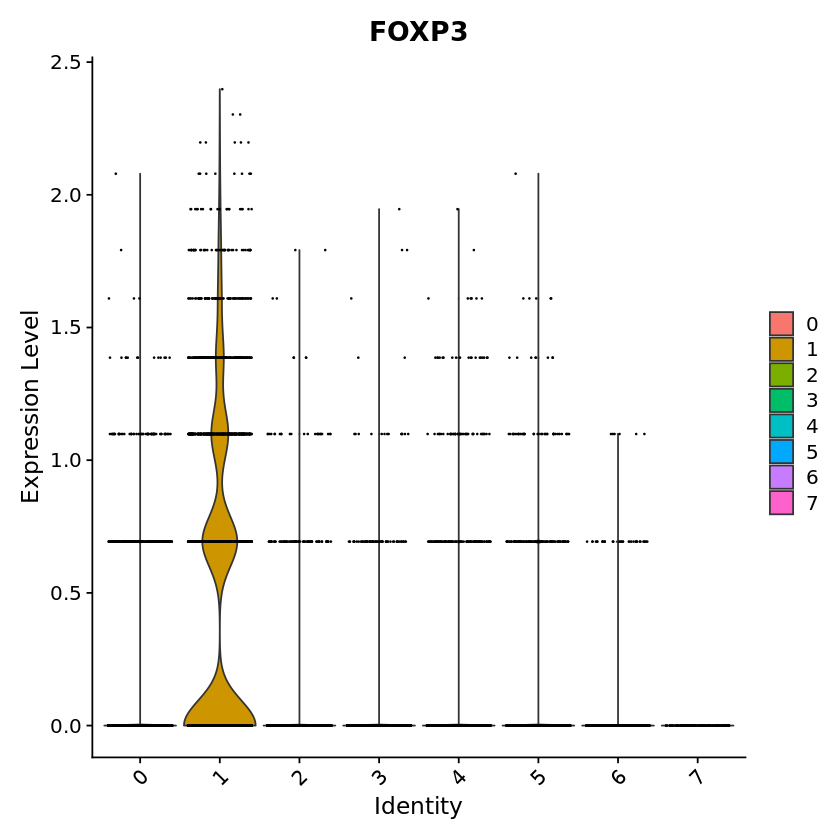

In [5]:
VlnPlot(object = obj, features = "FOXP3", group.by = "SCT_snn_res.0.4", pt.size = .1)


In [6]:
obj <- obj %>% subset(subset = (FOXP3 <1) & SCT_snn_res.0.4 != 1) 

In [7]:
obj <- RunUMAP(obj, dims = 1:40, verbose = FALSE, reduction = "harmony")

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


In [2]:
obj <- readRDS( "/net/bmc-lab5/data/kellis/users/ruiwenfu/scRNA/metastatic_all/takeda_39metastaticSamples_mt10_SCTmerge_CD4T_noTreg020622.rds")


In [5]:
obj[['Ident']] <- obj[['SCT_snn_res.0.4']]

In [6]:
DimPlot(obj, reduction = "umap",group.by = "Ident", label = TRUE)

In [ ]:
saveRDS(obj, "/net/bmc-lab5/data/kellis/users/ruiwenfu/scRNA/metastatic_all/takeda_39metastaticSamples_mt10_SCTmerge_CD4T_noTreg020622.rds")


## DBscan

In [ ]:
library(dbscan)

In [ ]:
umap.embed <- as.data.frame(obj[["umap"]]@cell.embeddings)
DB.res<-dbscan(umap.embed,eps=0.15,minPts=10)

In [ ]:
options(repr.plot.height = 6, repr.plot.width = 6)
plot(umap.embed,col=DB.res$cluster)

In [ ]:
meta <- obj@meta.data
meta$DBscan <- DB.res$cluster
obj@meta.data <- meta 

In [ ]:
options(repr.plot.height = 4, repr.plot.width = 4)

DimPlot(obj, reduction = "umap", group.by = 'DBscan', label = TRUE,
    label.size = 3, repel = TRUE)

In [ ]:
# obj <- obj %>% subset(subset = DBscan %in% c(1,2)) 

## cluster DEG

In [25]:
c3.4 <- FindMarkers(obj, ident.1 = 3, ident.2 = 4, min.pct = 0.25) 
c3.4%>% arrange(avg_log2FC)%>% head(20)

p_val        avg_log2FC pct.1 pct.2 p_val_adj   
MTRNR2L12 3.875127e-21 -0.8484692 0.774 0.819 7.182936e-17
NEAT1     1.035893e-15 -0.5642623 0.802 0.849 1.920131e-11
MALAT1    3.760668e-51 -0.5598475 1.000 1.000 6.970773e-47
SYNE2     1.183165e-24 -0.5279261 0.483 0.593 2.193115e-20
RNF213    2.666024e-28 -0.5077588 0.566 0.666 4.941742e-24
PLCG2     4.241787e-12 -0.4677353 0.212 0.302 7.862576e-08
DDX17     6.070359e-28 -0.4657800 0.510 0.624 1.125202e-23
PNISR     8.376176e-22 -0.4180848 0.591 0.669 1.552608e-17
SMCHD1    5.239182e-10 -0.4180707 0.581 0.637 9.711347e-06
PTPRC     8.240053e-28 -0.4098059 0.908 0.944 1.527376e-23
KIAA1551  1.088158e-16 -0.4029035 0.491 0.586 2.017009e-12
ARGLU1    1.034382e-21 -0.3982039 0.553 0.643 1.917330e-17
N4BP2L2   2.544739e-25 -0.3979477 0.596 0.698 4.716928e-21
MBNL1     7.669415e-16 -0.3914627 0.612 0.658 1.421603e-11
HSPH1     1.231169e-05 -0.3719375 0.609 0.638 2.282096e-01
DUSP4     8.625335e-05 -0.3691533 0.441 0.478 1.000000e+00
GCC2      2.949678e-13 -0.3687516 0.479 0.563 5.467524e-09
FUS       1.556318e-13 -0.3598865 0.753 0.800 2.884791e-09
CD27      1.157711e-14 -0.3591295 0.362 0.467 2.145934e-10
HNRNPA2B1 1.350795e-19 -0.3574361 0.860 0.894 2.503833e-15

# Diffusion map
- http://barcwiki.wi.mit.edu/wiki/SOP/scRNA-seq/diffusionMaps
- https://broadinstitute.github.io/2019_scWorkshop/functional-pseudotime-analysis.html#first-look-at-the-differentiation-data-from-deng-et-al.

In [75]:
library(SingleCellExperiment)
library(destiny)

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count



Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, 

In [76]:
sce <- as.SingleCellExperiment(DietSeurat(obj, assays = 'SCT', graphs = "pca", dimreducs = 'pca'))
table(sce$SCT_snn_res.0.8)


   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14 
3422 2699 2807 1302 1255 1061 1063  936  835  647  609  550  483  147  136 

In [77]:
sce

class: SingleCellExperiment 
dim: 18536 17952 
metadata(0):
assays(2): counts logcounts
rownames(18536): AL669831.5 LINC00115 ... DSCR4 RSPH1
rowData names(0):
colnames(17952): 11990_CELL_3825 11990_CELL_11403 ... 194011_CELL_9552
  194011_CELL_9561
colData names(36): sample_ID is_multiplet ... SCT_snn_res.1 ident
reducedDimNames(1): PCA
altExpNames(0):

In [78]:
counts<- t(as.matrix(counts(sce)))

In [79]:
# Make a diffusion map
sigmas <- find_sigmas(counts, verbose = FALSE)  # find optimal sigma

dm <- DiffusionMap(counts, sigma = optimal_sigma(sigmas),k = find_dm_k(nrow(counts)-1),
                   n_pcs = 30, n_eigs = 50)  

In [80]:
dm

DiffusionMap (50 Diffusion components and 17952 observations)
eigenvalues:    Named num [1:50] 0.993 0.988 0.98 0.966 0.954 ...
 - attr(*, "names")= chr [1:50] "DC1" "DC2" "DC3" "DC4" ...
eigenvectors:   num [1:17952, 1:50] 0.0174 0.0171 0.0169 0.0136 0.0175 ...
  ..colnames:   chr [1:50] "DC1" "DC2" "DC3" "DC4" ...
optimal_sigma:  num 199
distance:       chr "euclidean"

## analyze DM

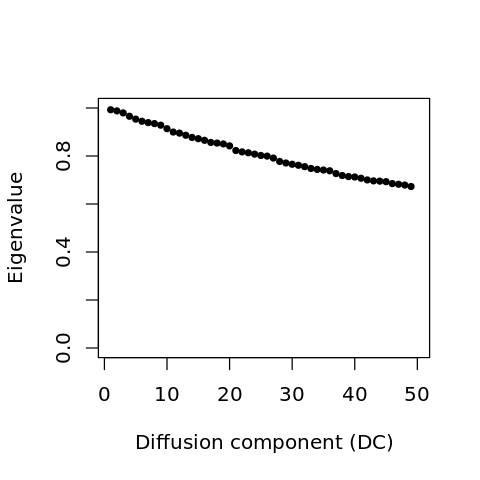

In [81]:
options(repr.plot.height = 4, repr.plot.width = 4)

plot(eigenvalues(dm), ylim = 0:1, pch = 20, xlab = 'Diffusion component (DC)', ylab = 'Eigenvalue')


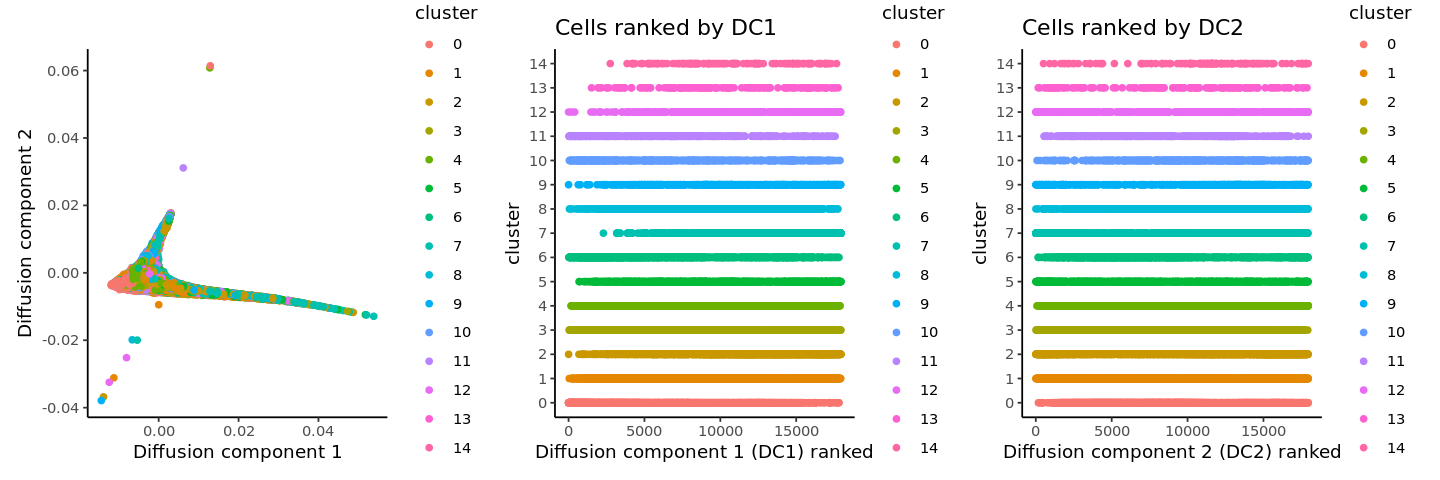

In [86]:
options(repr.plot.height = 4, repr.plot.width = 12)

tmp <- data.frame(DC1 = eigenvectors(dm)[, 3],
                  DC2 = eigenvectors(dm)[, 1],
                  DC1rank = rank(eigenvectors(dm)[,3]),
                  DC2rank = rank(eigenvectors(dm)[,1]),
                  cluster = sce$SCT_snn_res.0.8)

p1 <- ggplot(tmp, aes(x = DC1, y = DC2, colour = cluster)) +
    geom_point() +
    xlab("Diffusion component 1") + 
    ylab("Diffusion component 2") +
    theme_classic()

p2 <- ggplot(tmp, 
       aes(x = DC1rank , 
           y = cluster, colour = cluster)) +
    geom_point() +
    theme_classic() +
    xlab("Diffusion component 1 (DC1) ranked") + ylab("cluster") +
    ggtitle("Cells ranked by DC1")

p3 <- ggplot(tmp, 
       aes(x = DC2rank , 
           y = cluster, colour = cluster)) +
    geom_point() +
    theme_classic() +
    xlab("Diffusion component 2 (DC2) ranked") + ylab("cluster") +
    ggtitle("Cells ranked by DC2")

p1+p2+p3

## put DM in seurat

In [87]:
obj[["DC"]] <- CreateDimReducObject(embeddings = dm@eigenvectors,key = "DC_",  assay = 'SCT')


Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', 

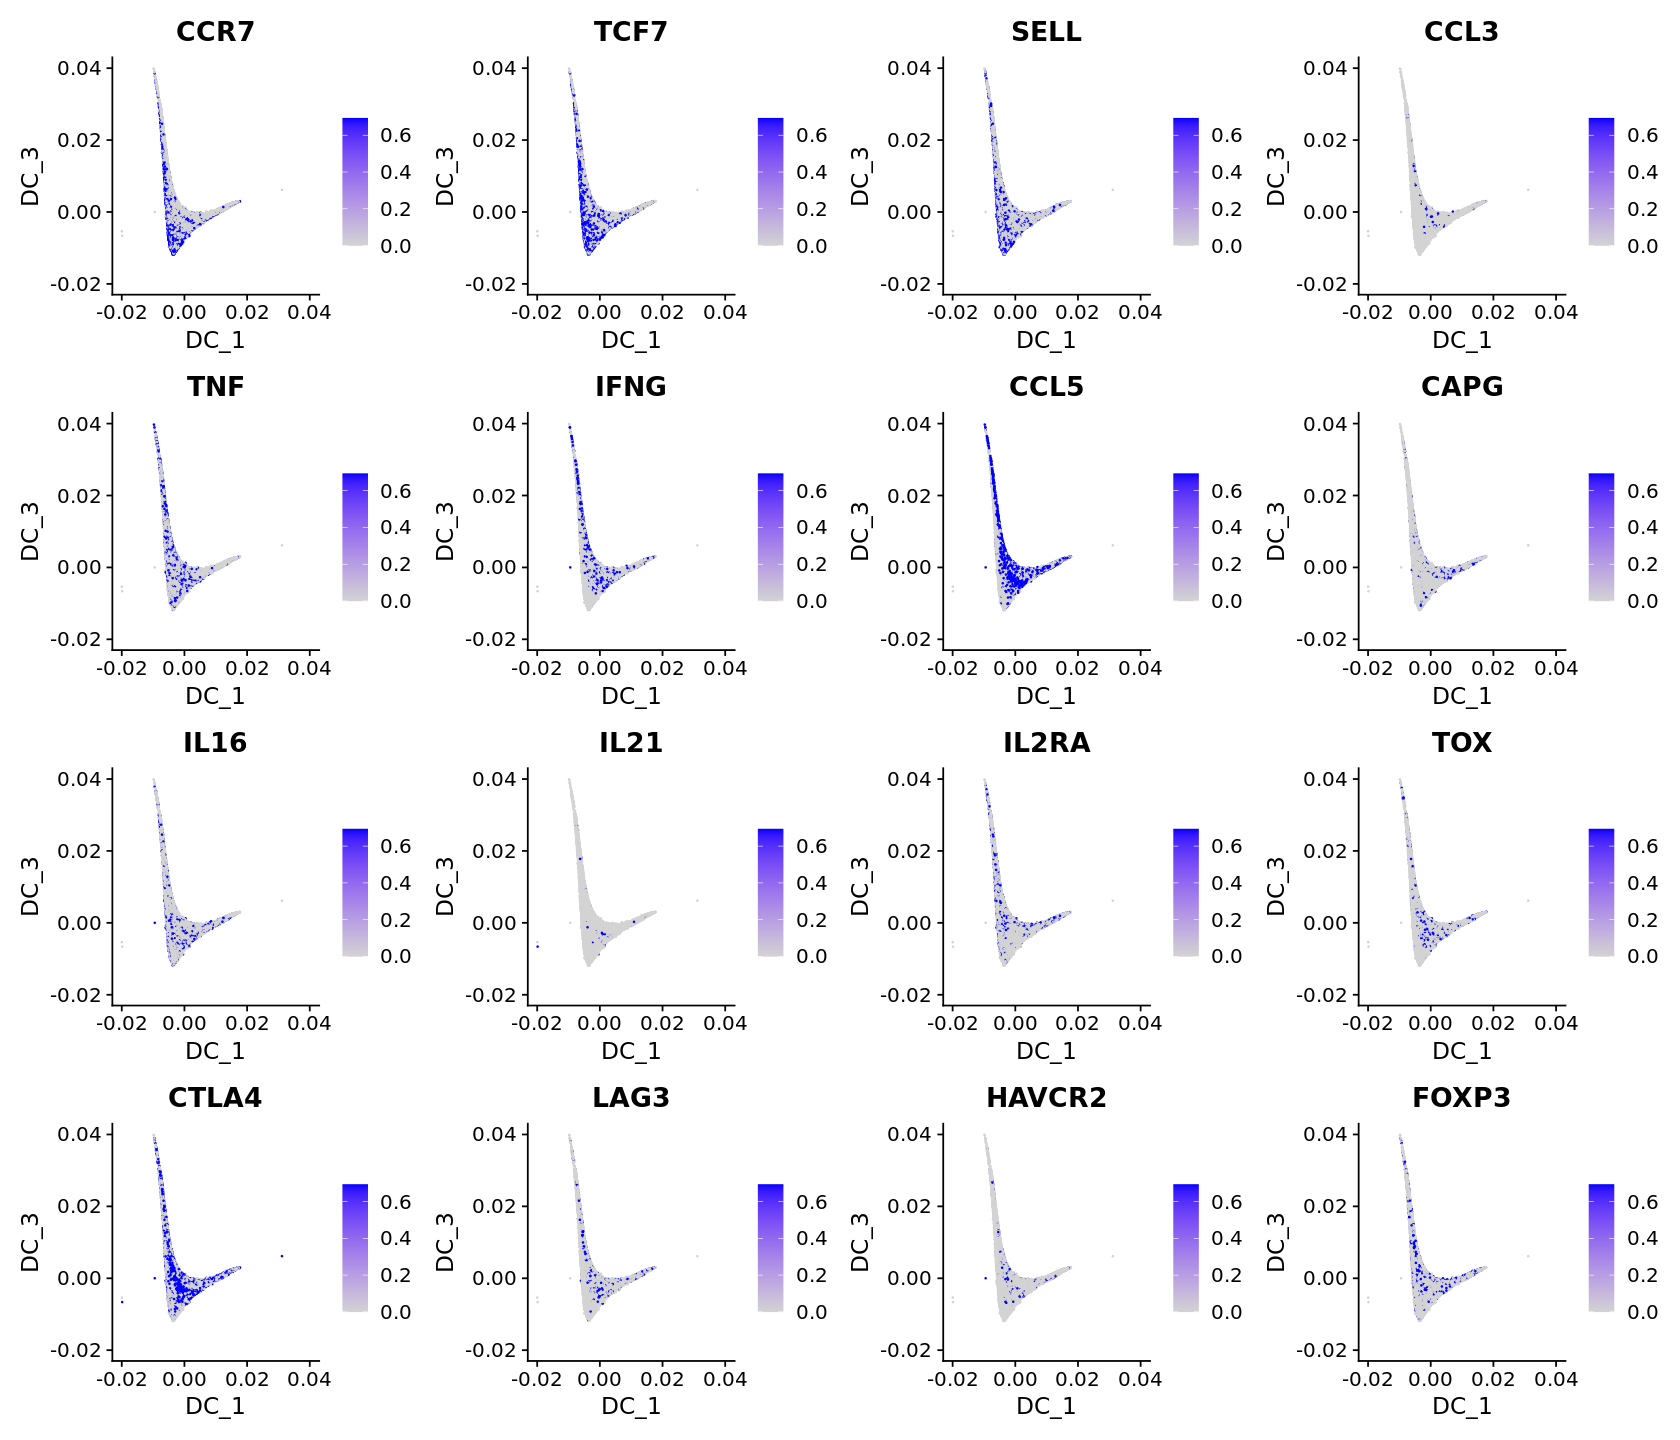

In [91]:
# cytotoxic
options(repr.plot.height = 12, repr.plot.width = 14)
plots <- FeaturePlot(obj, features = c("CCR7", "TCF7", "SELL", 'CCL3', 'TNF', 'IFNG','CCL5', 'CAPG',
                              'IL16','IL21','IL2RA',
                              'TOX', 'CTLA4','LAG3','HAVCR2','FOXP3') , ncol = 4, max.cutoff = 'q9',
            reduction = "DC", dims = c(1,3), combine = FALSE)
patchwork::wrap_plots(plots, ncol =4) *  xlim (-0.02, 0.04)* ylim (-0.02, 0.04)

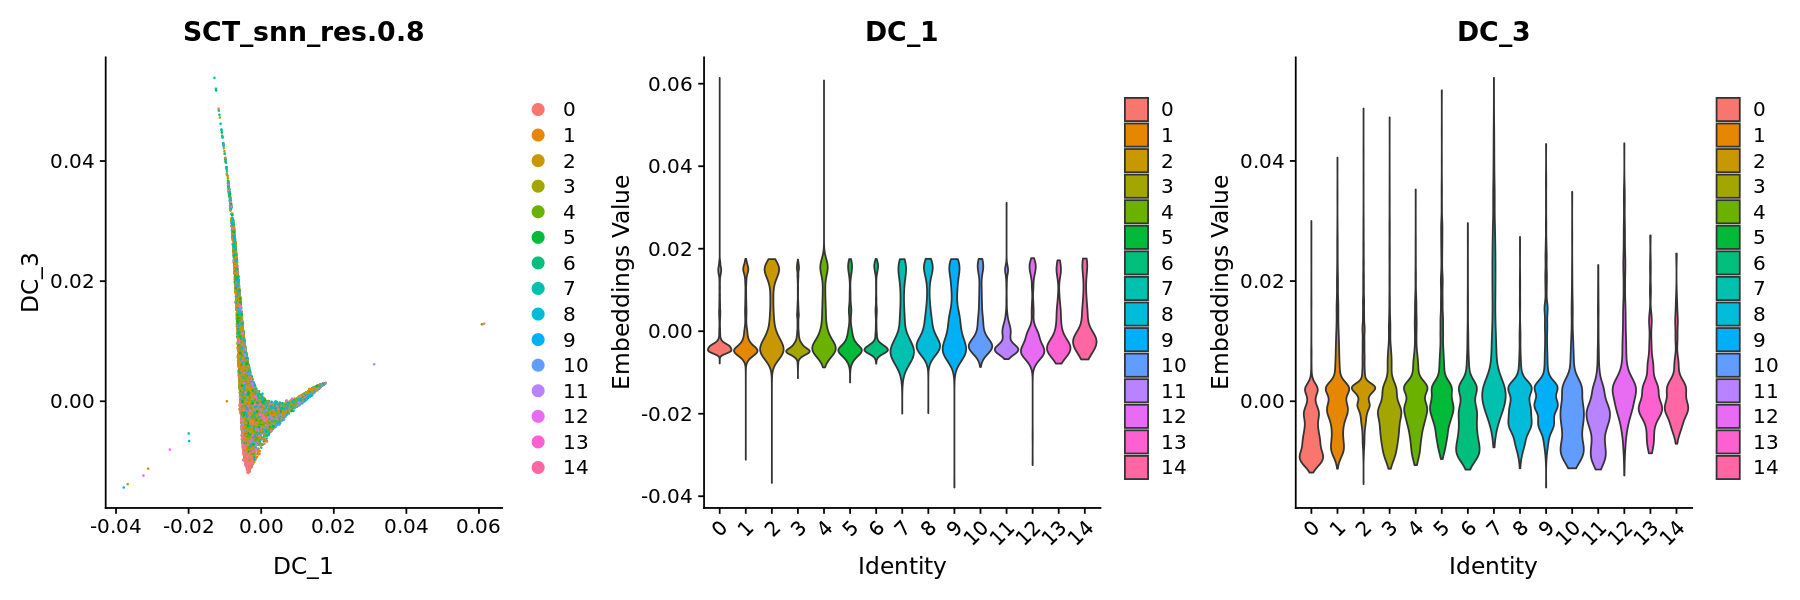

In [99]:
options(repr.plot.height = 5, repr.plot.width = 15)
p1 <- DimPlot(object = obj, reduction = "DC", dims = c(1,3), pt.size = .1, group.by = "SCT_snn_res.0.8")
p2 <- VlnPlot(object = obj, features = "DC_1", group.by = "SCT_snn_res.0.8", pt.size = 0)
p3 <- VlnPlot(object = obj, features = "DC_3", group.by = "SCT_snn_res.0.8", pt.size = 0)

patchwork::wrap_plots(p1+p2+p3) *  xlim (-0.02, 0.04)* ylim (-0.02, 0.04)


# monocle3

In [2]:
obj <- readRDS("/net/bmc-lab5/data/kellis/users/ruiwenfu/scRNA/metastatic_all/takeda_39metastaticSamples_mt10_SCTmerge_CD4T011422.rds")


Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



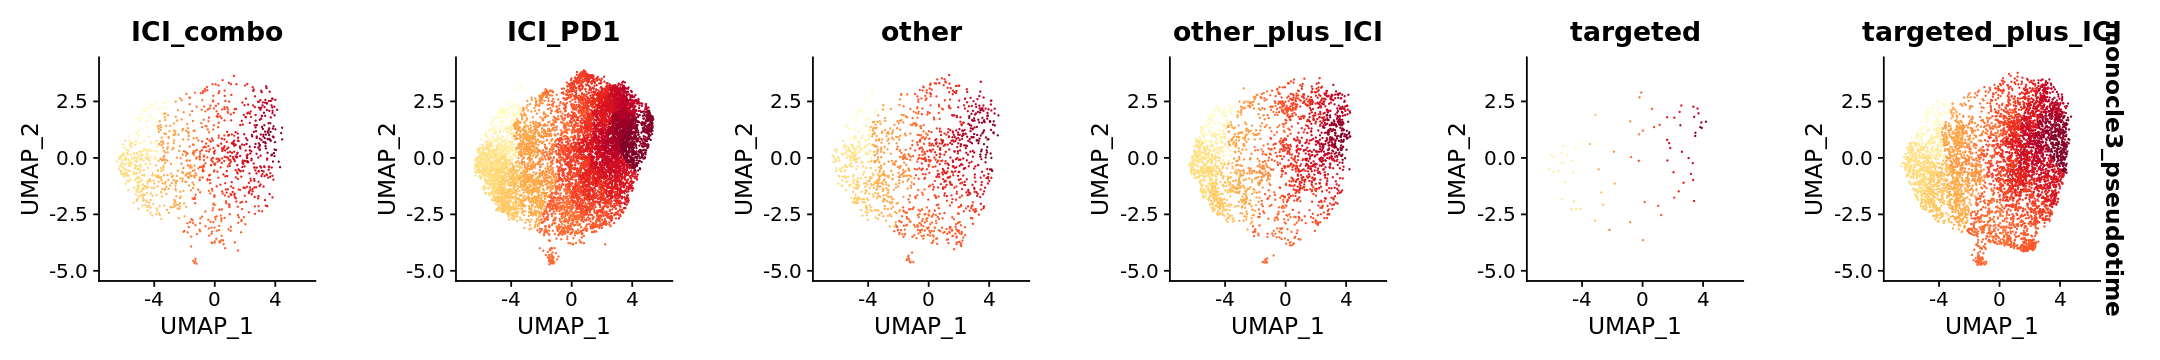

In [14]:
options(repr.plot.height = 3, repr.plot.width = 18)

FeaturePlot(obj, features = 'monocle3_pseudotime',reduction = "umap", split.by = "treatment_group",   
               pt.size = 0.01)& 
  scale_colour_gradientn(colours = rev(brewer.pal(n = 9, name = "YlOrRd")))

In [ ]:
options(repr.plot.height = 10, repr.plot.width = 20)

p1 <- DimPlot(obj, reduction = "umap", group.by = "uid",   
              label.size = 3, repel = TRUE)
p2 <- DimPlot(obj, reduction = "umap", group.by = "tissue",  cols =anno_col$tissue ,
              label.size = 3, repel = TRUE)
p3 <- DimPlot(obj, reduction = "umap", group.by =  "treatment_group",  cols =anno_col$treatment_group , 
              label.size = 3, repel = TRUE)
p4 <- DimPlot(obj, reduction = "umap", group.by =  "state",  cols =anno_col$state , 
              label.size = 3, repel = TRUE)

p5 <- FeaturePlot(obj, features = c('day') ,  reduction = "umap", )
p6 <- FeaturePlot(obj, features = 'pfs' ,  reduction = "umap", )

p1+p2+p3+p4 +p5+p6

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Warning message:
“Removed 36 rows containing missing values (geom_point).”


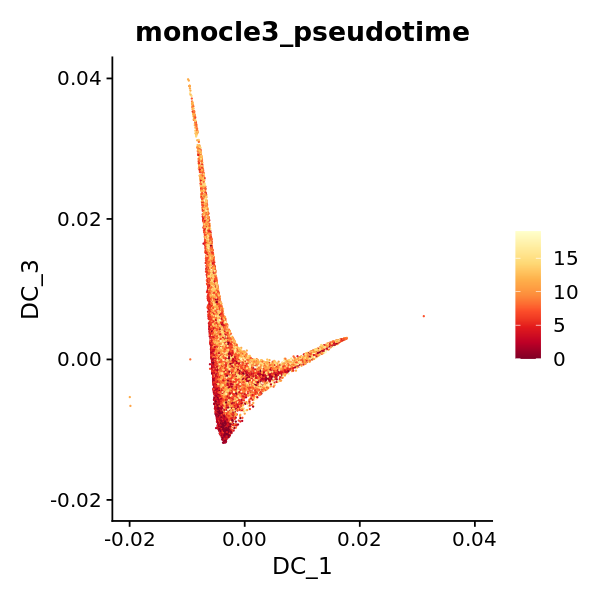

In [22]:
options(repr.plot.height = 5, repr.plot.width = 5)
FeaturePlot(object = obj,  features = 'monocle3_pseudotime',reduction = "DC", 
        dims = c(1,3), pt.size = .01)&xlim (-0.02, 0.04)&ylim (-0.02, 0.04)& 
  scale_colour_gradientn(colours = rev(brewer.pal(n = 9, name = "YlOrRd")))

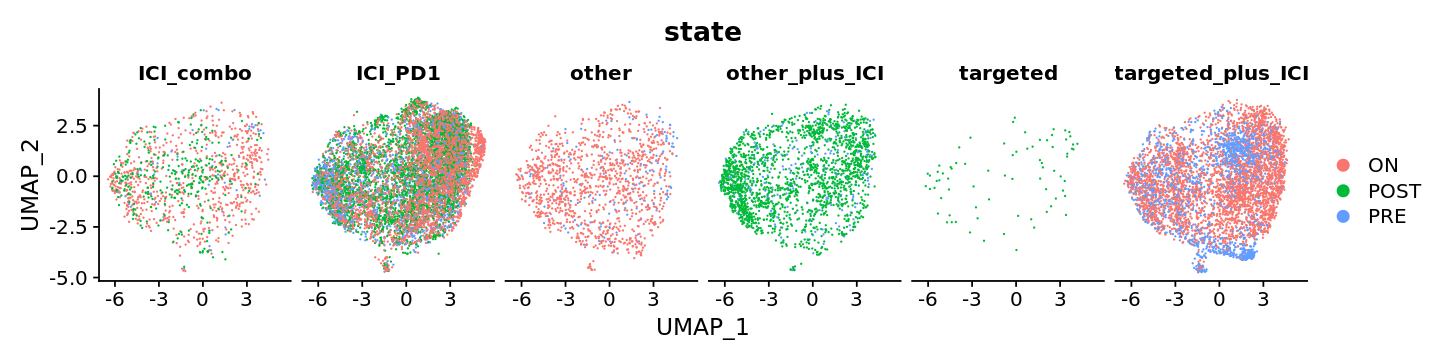

In [26]:
options(repr.plot.height = 3, repr.plot.width = 12)

DimPlot(obj, reduction = "umap", split.by = "treatment_group",   
               group.by = 'state',pt.size = 0.01)

# export for Cellrank

In [10]:
library(SeuratDisk)

Registered S3 method overwritten by 'cli':
  method     from         
  print.boxx spatstat.geom

Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat



In [11]:
objsmall <- DietSeurat(obj, assays = c('SCT', 'RNA'), dimreducs = c('pca', 'umap', 'DC', 'harmony'))

In [12]:
objsmall

An object of class Seurat 
46831 features across 14703 samples within 2 assays 
Active assay: SCT (18536 features, 0 variable features)
 1 other assay present: RNA
 4 dimensional reductions calculated: pca, umap, harmony, DC

In [14]:
SaveH5Seurat(objsmall, filename = "/net/bmc-lab5/data/kellis/users/ruiwenfu/scRNA/metastatic_all/cellrank/takeda_39metastaticSamples_mt10_SCTmerge_CD4T_noTreg020622.h5Seurat")
Convert("/net/bmc-lab5/data/kellis/users/ruiwenfu/scRNA/metastatic_all/cellrank/takeda_39metastaticSamples_mt10_SCTmerge_CD4T_noTreg020622.h5Seurat",
        dest = "/net/bmc-lab5/data/kellis/users/ruiwenfu/scRNA/metastatic_all/cellrank/takeda_39metastaticSamples_mt10_SCTmerge_CD4T_noTreg020622.h5ad")

Creating h5Seurat file for version 3.1.5.9900

Adding counts for RNA

Adding data for RNA

No variable features found for RNA

No feature-level metadata found for RNA

Adding counts for SCT

Adding data for SCT

No variable features found for SCT

No feature-level metadata found for SCT

Writing out SCTModel.list for SCT

Adding cell embeddings for pca

Adding loadings for pca

No projected loadings for pca

Adding standard deviations for pca

No JackStraw data for pca

Adding cell embeddings for umap

No loadings for umap

No projected loadings for umap

No standard deviations for umap

No JackStraw data for umap

Adding cell embeddings for harmony

Adding loadings for harmony

Adding projected loadings for harmony

Adding standard deviations for harmony

No JackStraw data for harmony

Adding cell embeddings for DC

No loadings for DC

No projected loadings for DC

No standard deviations for DC

No JackStraw data for DC

Validating h5Seurat file

Adding data from SCT as X

Adding coun